## Loss analysis tools for faster training

In [1]:
# As usual, a bit of setup
import matplotlib.pyplot as plt
import extract_seconds
from parse_log import parse_log
from pprint import pprint
import numpy as np
import os

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

### parse log file function

In [7]:
# test parse_log
ROOT = "../"
LOG_ROOT = os.path.join(ROOT, './experiments/logs')
for log_file in os.listdir(LOG_ROOT):
    print(log_file)

log_file = os.path.join(LOG_ROOT, 'faster_rcnn_end2end_VGG16_.txt.2018-01-06_15-59-35')
train_dict_list, test_dict_list = parse_log(log_file)

faster_rcnn_end2end_VGG16_.txt.2018-01-03_20-23-23
faster_rcnn_end2end_VGG16_.txt.2018-01-06_15-59-35
.gitignore
faster_rcnn_end2end_VGG16_.txt.2018-01-05_16-30-13
faster_rcnn_end2end_VGG16_.txt.2018-01-04_17-50-55


In [11]:
print(type(train_dict_list[0]))
for k, v in train_dict_list[0].items():
    print k
    print v

<class 'collections.OrderedDict'>
NumIters
20.0
Seconds
21.513419
LearningRate
0.001
accuracy
0.835938
loss_bbox
0.184852
loss_cls
0.322793
rpn_cls_loss
0.28818
rpn_loss_bbox
0.136198


In [12]:
# pprint(train_dict_list)
# pprint(test_dict_list)

3499


Text(0.5,1,u'accuracy')

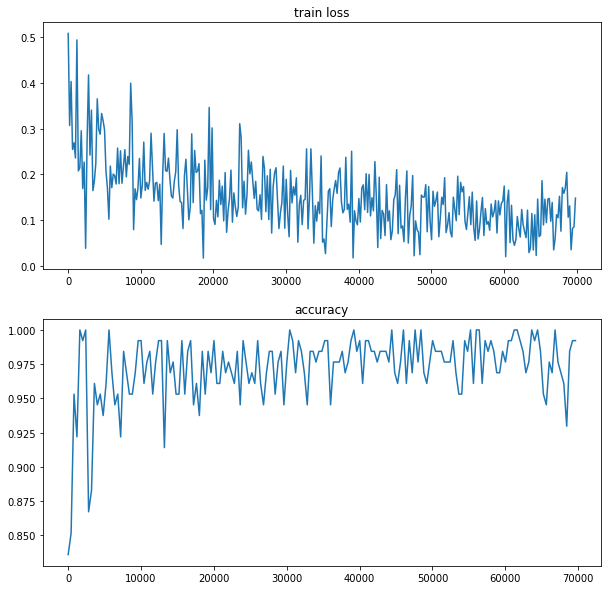

In [26]:
train_num_iters = []
train_seconds = []
train_learning_rates = []
train_bbox_loss = []
train_cls_loss = []
train_rpn_cls_loss = []
train_rpn_bbox_loss = []
accuracy = []
for d in train_dict_list:
    train_num_iters.append(d['NumIters'])
    train_seconds.append(d['Seconds'])
    train_learning_rates.append(d['LearningRate'])
    train_bbox_loss.append(d['loss_bbox'])
    train_cls_loss.append(d['loss_cls'])
    train_rpn_cls_loss.append(d['rpn_cls_loss'])
    train_rpn_bbox_loss.append(d['rpn_loss_bbox'])
    accuracy.append(d['accuracy'])

print(len(train_num_iters))
train_bbox_loss = np.array(train_bbox_loss)
train_cls_loss = np.array(train_cls_loss)
train_loss = train_bbox_loss + train_cls_loss

fig = plt.figure(figsize=(10, 10))
plt.tight_layout(h_pad=20)

ax = fig.add_subplot(2, 1, 1)
ax.plot(train_num_iters[::10], train_loss[::10])
ax.set_title('train loss')

bx = fig.add_subplot(2, 1, 2)
bx.plot(train_num_iters[::20], accuracy[::20])
bx.set_title('accuracy')